In [1]:
import graphviz as gz
import random

digraph {
	1 [label=test1]
	2 [label=Test2]
	3 [label=Test3]
	4 [label=Test4]
	1 -> 2
	2 -> 3
	3 -> 4
	2 -> 4
}


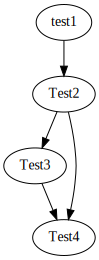

In [2]:
dot = gz.Digraph()
dot.node('1', 'test1')
dot.node('2', 'Test2')
dot.node('3', 'Test3')
dot.node('4', 'Test4')
dot.edges(['12', '23', '34', '24'])
print(dot)
dot

graph {
	1 [label=test1]
	2 [label=Test2]
	3 [label=Test3]
	4 [label=Test4]
	1 -- 2
	2 -- 3
	3 -- 4
	2 -- 4
}


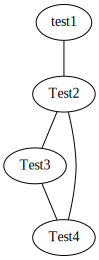

In [4]:
dot = gz.Graph()
dot.node('1', 'test1')
dot.node('2', 'Test2')
dot.node('3', 'Test3')
dot.node('4', 'Test4')
dot.edges(['12', '23', '34', '24'])
print(dot)
dot

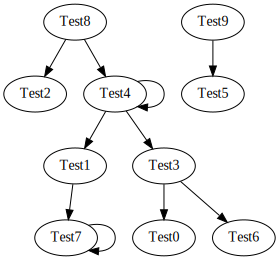

In [5]:
dot = gz.Digraph()
for i in range(10):
    dot.node('%s' % i, 'Test%s' % i)
dot.edges([str(random.randint(10, 99)) for i in range(10)])
dot

In [6]:
def neural_graph(inp=3, hide=(10,), outp=3, inp_label='input', hide_label='hide', outp_label='output', dropout=True,
                 style='h', size='2, 1'):
    """
    绘制简易神经网络图（有向图）
    :param inp: 输入神经元个数
    :param hide: 隐藏层神经元个数, 可迭代数组
    :param outp: 输出神经元个数
    :param inp_label: 输入名称显示
    :param hide_label: 隐藏层名称显示
    :param outp_label: 输出名称显示
    :param dropout: 是否全连接
    :param style: 水平或垂直显示， 可选项为 'h', 'v'
    :param size: 图像显示大小
    :return: 有向图
    """

    dot = gz.Digraph(name='neural network')
    dot.attr(size=size)
    if style == 'v':
        dot.attr(rankdir='LR')

    def draw(enter, exit, label1, label2):
        for i in range(enter):
            for j in range(exit):
                if dropout:
                    if random.randint(0, max(enter, exit)):
                        dot.edge('%s%s' % (label1, i), '%s%s' % (label2, j))
                else:
                    dot.edge('%s%s' % (label1, i), '%s%s' % (label2, j))

    hide = list(hide)
    hide.insert(0, inp)
    hide.append(outp)
    for index, (i, j) in enumerate(zip(hide[:-1], hide[1:])):
        if index == 0:
            draw(i, j, inp_label, hide_label + str(index))
        elif index == len(hide) - 2:
            draw(i, j, hide_label + str(index - 1), outp_label)
        else:
            draw(i, j, hide_label + str(index - 1), hide_label + str(index))

    return dot
    # 其他运行方式
    # return dot.view()

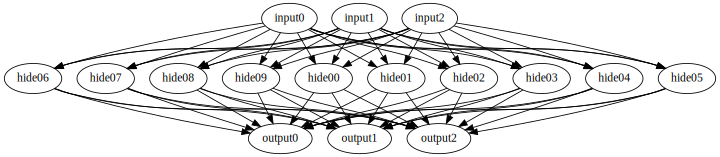

In [7]:
neural_graph(size='10,6',dropout=False)

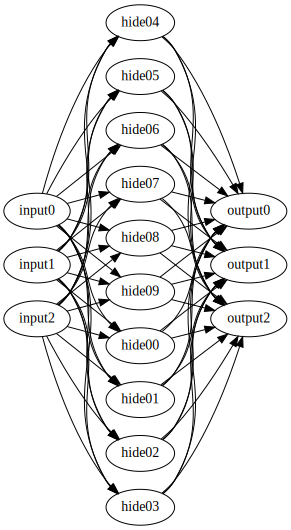

In [8]:
neural_graph(size='10,8',style='v',dropout=False)